In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r'../raw_data/df_energy_weather.csv', index_col=[0])
df.shape


(3417, 40)

In [3]:
apple_training_complete = df[0:3238].drop(columns=['Date'])

In [4]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [5]:
apple_training_processed

array([[257058.27872621],
       [280064.        ],
       [285526.        ],
       ...,
       [231720.        ],
       [212996.        ],
       [219275.        ]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [7]:
features_set = []
labels = []
for i in range(60, 1260):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [8]:
features_set, labels = np.array(features_set), np.array(labels)

In [9]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [35]:
model = Sequential()

In [36]:
model = Sequential()

model.add(LSTM(units=90, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=70, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))



'''
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
'''

'\nmodel = Sequential()\n\nmodel.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))\nmodel.add(Dropout(0.2))\n\nmodel.add(LSTM(units=50, return_sequences=True))\nmodel.add(Dropout(0.2))\n\nmodel.add(LSTM(units=50, return_sequences=True))\nmodel.add(Dropout(0.2))\n\nmodel.add(LSTM(units=50))\nmodel.add(Dropout(0.2))\n'

In [37]:
model.add(Dense(units = 1, activation ='linear'))

In [38]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [39]:
model.fit(features_set, labels, epochs = 90, batch_size = 32)

Epoch 1/90
38/38 [==============================] - 7s 87ms/step - loss: 0.0526
Epoch 2/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0112
Epoch 3/90
38/38 [==============================] - 3s 84ms/step - loss: 0.0111
Epoch 4/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0099
Epoch 5/90
38/38 [==============================] - 3s 84ms/step - loss: 0.0097
Epoch 6/90
38/38 [==============================] - 3s 89ms/step - loss: 0.0094
Epoch 7/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0084
Epoch 8/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0074
Epoch 9/90
38/38 [==============================] - 3s 85ms/step - loss: 0.0075
Epoch 10/90
38/38 [==============================] - 3s 86ms/step - loss: 0.0087
Epoch 11/90
38/38 [==============================] - 3s 84ms/step - loss: 0.0078
Epoch 12/90
38/38 [==============================] - 3s 86ms/step - loss: 0.0065
Epoch 13/90
38/38 [==================

In [41]:
apple_testing_complete = df[3238:].drop(columns=['Date'])
#apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values
apple_testing_processed = apple_testing_complete['Consommation (MW)'].values

In [42]:
apple_total = pd.concat((apple_training_complete['Consommation (MW)'], apple_testing_complete['Consommation (MW)']), axis=0)
apple_total

0       257058.278726
1       280064.000000
2       285526.000000
3       286799.000000
4       267848.000000
            ...      
3412    218296.000000
3413    209770.000000
3414    201061.000000
3415    194195.000000
3416    187301.000000
Name: Consommation (MW), Length: 3417, dtype: float64

In [43]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [44]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
test_inputs

array([[0.21651559],
       [0.22172419],
       [0.21551209],
       [0.21660638],
       [0.15137455],
       [0.11041769],
       [0.15998069],
       [0.17327937],
       [0.17993587],
       [0.18484821],
       [0.1896602 ],
       [0.15091103],
       [0.09194864],
       [0.16135214],
       [0.17377634],
       [0.18005534],
       [0.17963482],
       [0.18342898],
       [0.12659782],
       [0.10491282],
       [0.13968146],
       [0.15572302],
       [0.17708786],
       [0.17969217],
       [0.19515074],
       [0.14816337],
       [0.12356345],
       [0.17570209],
       [0.19064458],
       [0.19730586],
       [0.20411528],
       [0.21469496],
       [0.1710239 ],
       [0.13920839],
       [0.19682801],
       [0.20647588],
       [0.20554406],
       [0.18964586],
       [0.20119559],
       [0.18121652],
       [0.1595554 ],
       [0.21894786],
       [0.23177346],
       [0.23703463],
       [0.25073948],
       [0.25208703],
       [0.23428697],
       [0.165

In [45]:
test_features = []
for i in range(60, 240):
    test_features.append(test_inputs[i-60:i, 0])
test_features

[array([0.21651559, 0.22172419, 0.21551209, 0.21660638, 0.15137455,
        0.11041769, 0.15998069, 0.17327937, 0.17993587, 0.18484821,
        0.1896602 , 0.15091103, 0.09194864, 0.16135214, 0.17377634,
        0.18005534, 0.17963482, 0.18342898, 0.12659782, 0.10491282,
        0.13968146, 0.15572302, 0.17708786, 0.17969217, 0.19515074,
        0.14816337, 0.12356345, 0.17570209, 0.19064458, 0.19730586,
        0.20411528, 0.21469496, 0.1710239 , 0.13920839, 0.19682801,
        0.20647588, 0.20554406, 0.18964586, 0.20119559, 0.18121652,
        0.1595554 , 0.21894786, 0.23177346, 0.23703463, 0.25073948,
        0.25208703, 0.23428697, 0.16508417, 0.16841482, 0.23807157,
        0.29075496, 0.36449737, 0.40640515, 0.36388094, 0.36494655,
        0.37753322, 0.39497489, 0.37286459, 0.28339123, 0.31339568]),
 array([0.22172419, 0.21551209, 0.21660638, 0.15137455, 0.11041769,
        0.15998069, 0.17327937, 0.17993587, 0.18484821, 0.1896602 ,
        0.15091103, 0.09194864, 0.16135214, 0.

In [46]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [47]:
predictions = model.predict(test_features)
predictions

array([[0.33720964],
       [0.29097384],
       [0.29960644],
       [0.3738153 ],
       [0.32561466],
       [0.3608343 ],
       [0.36742568],
       [0.37251967],
       [0.345183  ],
       [0.37517416],
       [0.43421784],
       [0.4245899 ],
       [0.43606418],
       [0.46485817],
       [0.4788389 ],
       [0.48280397],
       [0.51747227],
       [0.6267963 ],
       [0.6685947 ],
       [0.6294081 ],
       [0.59979784],
       [0.67996484],
       [0.5982241 ],
       [0.5927455 ],
       [0.67670834],
       [0.64329374],
       [0.6150327 ],
       [0.6653377 ],
       [0.6949201 ],
       [0.6139437 ],
       [0.6150869 ],
       [0.67821   ],
       [0.6519279 ],
       [0.61681724],
       [0.65332615],
       [0.6385281 ],
       [0.57184386],
       [0.580919  ],
       [0.6927343 ],
       [0.67231226],
       [0.6424117 ],
       [0.62715757],
       [0.5434581 ],
       [0.46021634],
       [0.4701336 ],
       [0.56636524],
       [0.5050907 ],
       [0.420

In [48]:
predictions = scaler.inverse_transform(predictions)
predictions

array([[224258.52],
       [214582.8 ],
       [216389.34],
       [231918.95],
       [221832.06],
       [229202.42],
       [230581.81],
       [231647.81],
       [225927.11],
       [232203.33],
       [244559.33],
       [242544.5 ],
       [244945.7 ],
       [250971.4 ],
       [253897.14],
       [254726.9 ],
       [261981.9 ],
       [284860.03],
       [293607.16],
       [285406.62],
       [279210.1 ],
       [295986.56],
       [278880.75],
       [277734.25],
       [295305.1 ],
       [288312.44],
       [282398.28],
       [292925.56],
       [299116.22],
       [282170.38],
       [282409.62],
       [295619.34],
       [290119.28],
       [282771.72],
       [290411.9 ],
       [287315.16],
       [273360.2 ],
       [275259.34],
       [298658.8 ],
       [294385.12],
       [288127.84],
       [284935.62],
       [267419.94],
       [250000.  ],
       [252075.38],
       [272213.7 ],
       [259390.83],
       [241603.73],
       [234392.88],
       [242319.5 ],


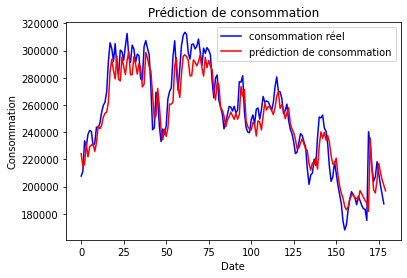

In [49]:
plt.figure()#figsize=(10,6)
plt.plot(apple_testing_processed, color='blue', label='consommation réel')
plt.plot(predictions , color='red', label='prédiction de consommation')
plt.title('Prédiction de consommation')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.legend()
plt.show()

In [40]:
# test
res = model_2.evaluate(X_test, y_test, verbose=1)

print(f'MAPE on the test set : {res[1]:.0f} %')

NameError: name 'model_2' is not defined